In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.precision", 2)

In [2]:
# Read data
food_df = pd.read_csv('/content/zomato_data.csv')
food_df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [3]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   online_order               51717 non-null  object
 1   book_table                 51717 non-null  object
 2   rate                       43942 non-null  object
 3   votes                      51717 non-null  int64 
 4   rest_type                  51490 non-null  object
 5   dish_liked                 23639 non-null  object
 6   cuisines                   51672 non-null  object
 7   approx_costfor_two_people  51371 non-null  object
 8   listed_intype              51717 non-null  object
 9   listed_incity              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [4]:
food_df.describe(include='all')

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
count,51717,51717,43942,51717.00,51490,23639,51672,51371,51717,51717
unique,2,2,64,NaN,93,5271,2723,70,7,30
top,Yes,No,NEW,NaN,Quick Bites,Biryani,North Indian,300,Delivery,BTM
freq,30444,45268,2208,NaN,19132,182,2913,7576,25942,3279
mean,NaN,NaN,NaN,283.70,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,803.84,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,7.00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,41.00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,198.00,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Investigating missing values
food_df.isnull().sum().sort_values(ascending=False)

,0
dish_liked,28078
rate,7775
approx_costfor_two_people,346
rest_type,227
cuisines,45
online_order,0
book_table,0
votes,0
listed_intype,0
listed_incity,0


In [6]:
# Check for duplicates
print(food_df.duplicated().sum())

809




*   The data needs cleaning: a lot of missing data, duplicates and data type formatting.




### **Cleaning**

In [7]:
# Drop duplicates
food_df.drop_duplicates(inplace=True)
print(food_df.duplicated().sum())

0


In [8]:
food_df.shape

(50908, 10)

Rate

In [9]:
food_df['rate'].describe()

,rate
count,43797
unique,64
top,NEW
freq,2160


In [10]:
food_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
# Replace '-' and 'NEW' in rate with NaN
food_df['rate'] = food_df['rate'].replace(['-', 'NEW'], np.nan)

# Remove '/5' and convert to float
food_df['rate'] = food_df['rate'].str.replace('/5', '', regex=False).str.strip()
food_df['rate'] = pd.to_numeric(food_df['rate'], errors='coerce')

food_df['rate'].describe()

,rate
count,41569.00
mean,3.70
std,0.44
min,1.80
25%,3.40
50%,3.70
75%,4.00
max,4.90


In [12]:
# Fill missing values with median which is same as mean
food_df['rate'] = food_df['rate'].fillna(food_df['rate'].median())

# Updated summary statistics
food_df['rate'].describe()

,rate
count,50908.0
mean,3.7
std,0.4
min,1.8
25%,3.5
50%,3.7
75%,3.9
max,4.9


Cost

In [13]:
food_df['approx_costfor_two_people'].describe()

,approx_costfor_two_people
count,50567
unique,70
top,300
freq,7288


In [14]:
food_df['approx_costfor_two_people'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [15]:
# Remove the ',' in the values
food_df['approx_costfor_two_people'] = food_df['approx_costfor_two_people'].str.replace(',', '')

# Convert to float data type
food_df['approx_costfor_two_people'] = pd.to_numeric(food_df
 ['approx_costfor_two_people'], errors='coerce')

In [16]:
food_df['approx_costfor_two_people'].describe()

,approx_costfor_two_people
count,50567.00
mean,559.07
std,440.18
min,40.00
25%,300.00
50%,400.00
75%,700.00
max,6000.00


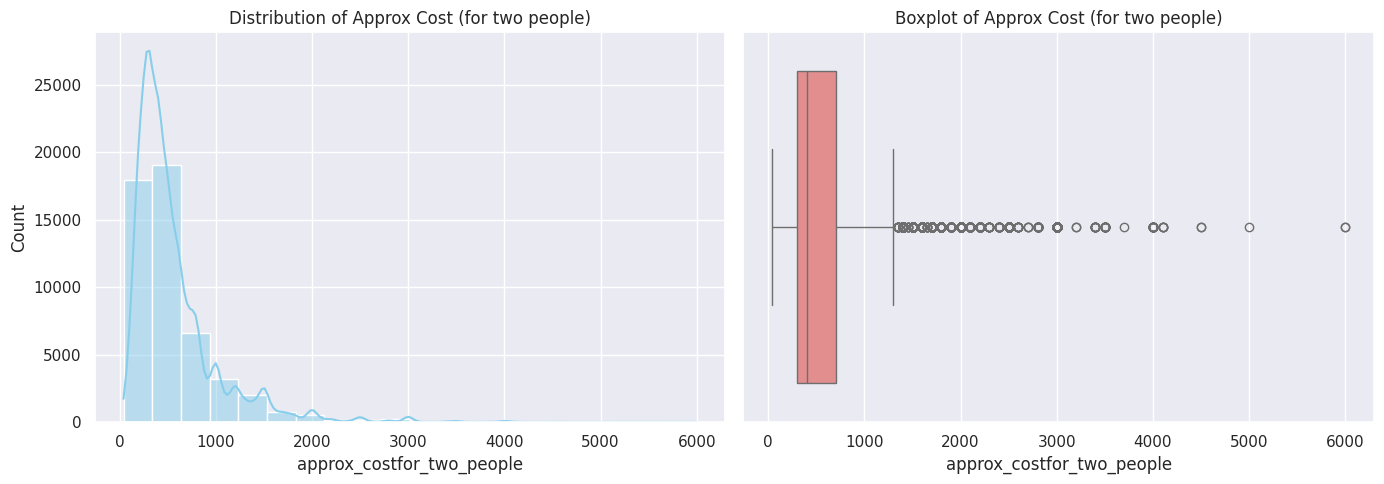

In [17]:
# Set style for better visuals
sns.set(style="darkgrid")

# Plot histogram and boxplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
sns.histplot(food_df['approx_costfor_two_people'], kde=True, ax=axes[0],bins=20, color='skyblue')
axes[0].set_title("Distribution of Approx Cost (for two people)")

# Boxplot
sns.boxplot(x=food_df['approx_costfor_two_people'], ax=axes[1], color='lightcoral')
axes[1].set_title("Boxplot of Approx Cost (for two people)")

plt.tight_layout()

The cost column is right skewed, which explains the inflated mean(₹559) vs the median(₹400). The box plot shows a concentration of data below ₹1000, with many outliers on the higher side (₹2000+).

We fill the missing values with the median because it gives a better "typical" cost.

In [18]:
# Filling missing values with median
food_df['approx_costfor_two_people'] = food_df['approx_costfor_two_people'].fillna(food_df['approx_costfor_two_people'].median())

food_df['approx_costfor_two_people'].describe()

,approx_costfor_two_people
count,50908.0
mean,558.0
std,438.9
min,40.0
25%,300.0
50%,400.0
75%,700.0
max,6000.0


In [19]:
# Convert to integer
food_df['approx_costfor_two_people'] = food_df['approx_costfor_two_people'].astype(int)

In [20]:
# Fill missing values
food_df['rest_type'] = food_df['rest_type'].fillna('Unknown')
food_df['dish_liked'] = food_df['dish_liked'].fillna('Not Available')
food_df['cuisines'] = food_df['cuisines'].fillna('Other')

In [21]:
# Convert 'online_order' and 'book_table' to boolean values
food_df['online_order'] = food_df['online_order'].map({'Yes': 1, 'No': 0})
food_df['book_table'] = food_df['book_table'].map({'Yes': 1, 'No': 0})

In [22]:
food_df[['book_table', 'online_order']].sample(3)

,book_table,online_order
11574,0,0
36713,1,1
35188,0,0


In [23]:
food_df['votes'].describe()

,votes
count,50908.00
mean,287.18
std,808.10
min,0.00
25%,7.00
50%,42.00
75%,203.00
max,16832.00


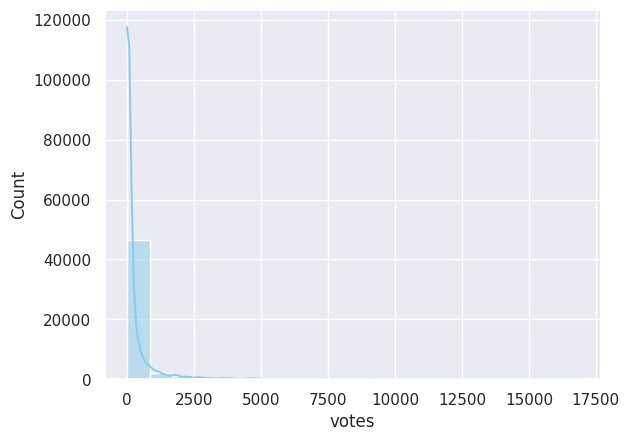

In [24]:
# Histogram
sns.histplot(food_df['votes'], kde=True, bins=20, color='skyblue');

In [25]:
# Investigate which entry has max votes
max_votes = food_df[food_df['votes'] == food_df['votes'].max()]
max_votes

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
49170,1,1,4.9,16832,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600,Delivery,Sarjapur Road
49627,1,1,4.9,16832,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600,Dine-out,Sarjapur Road
50059,1,1,4.9,16832,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600,Drinks & nightlife,Sarjapur Road


In [26]:
max_rating = food_df[food_df['rate'] == food_df['rate'].max()]
max_rating

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
3921,1,1,4.9,16345,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600,Delivery,Bellandur
4801,1,1,4.9,16345,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600,Dine-out,Bellandur
4944,1,1,4.9,16345,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600,Drinks & nightlife,Bellandur
5153,1,0,4.9,1746,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400,Delivery,Brigade Road
5809,1,0,4.9,1746,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400,Desserts,Brigade Road
6746,0,1,4.9,2745,Casual Dining,"Pizza, Mutton Kebab, Chicken Biryani, Sea Food...","Asian, Mediterranean, North Indian, BBQ",1400,Buffet,Brookefield
7118,1,0,4.9,518,Casual Dining,"Kadai Paneer, Kulfi, Kadhai Paneer, Dahi Kebab...",North Indian,2000,Delivery,Brookefield
7888,0,1,4.9,2745,Casual Dining,"Pizza, Mutton Kebab, Chicken Biryani, Sea Food...","Asian, Mediterranean, North Indian, BBQ",1400,Dine-out,Brookefield
8260,0,1,4.9,6375,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ",1600,Buffet,BTM
8275,1,1,4.9,2178,"Casual Dining, Bar","Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum...","Asian, Chinese, Thai, Momos",1500,Buffet,BTM


Restaurants with the highest rating vary in terms of cost, restraurant type and cuisines.

In [27]:
food_df['listed_intype'].value_counts()

,count
listed_intype,
Delivery,25606
Dine-out,17361
Desserts,3550
Cafes,1723
Drinks & nightlife,1094
Buffet,880
Pubs and bars,694


In [28]:
food_df['listed_incity'].value_counts()

,count
listed_incity,
BTM,3213
Koramangala 7th Block,2890
Koramangala 5th Block,2788
Koramangala 4th Block,2742
Koramangala 6th Block,2591
Jayanagar,2339
JP Nagar,2070
Indiranagar,1843
MG Road,1787


In [29]:
food_df['listed_incity'].nunique()

30

In [30]:
# Make sure the data is clean
print(food_df.isnull().sum())
food_df.info()

online_order                 0
book_table                   0
rate                         0
votes                        0
rest_type                    0
dish_liked                   0
cuisines                     0
approx_costfor_two_people    0
listed_intype                0
listed_incity                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 50908 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               50908 non-null  int64  
 1   book_table                 50908 non-null  int64  
 2   rate                       50908 non-null  float64
 3   votes                      50908 non-null  int64  
 4   rest_type                  50908 non-null  object 
 5   dish_liked                 50908 non-null  object 
 6   cuisines                   50908 non-null  object 
 7   approx_costfor_two_people  50908 non-null  int64  
 8   listed_i

In [31]:
food_df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [32]:
geo_df = pd.read_csv('/content/Geographical Coordinates.csv')
geo_df.head()

,listed_incity,Latitude,Longitude
0,Banashankari,12.94,77.55
1,Bannerghatta Road,12.95,77.61
2,Basavanagudi,12.94,77.58
3,Bellandur,12.93,77.68
4,Brigade Road,12.97,77.61


In [33]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   listed_incity  26 non-null     object 
 1   Latitude       26 non-null     float64
 2   Longitude      26 non-null     float64
dtypes: float64(2), object(1)
memory usage: 756.0+ bytes


In [34]:
geo_df.isnull().sum()

,0
listed_incity,0
Latitude,0
Longitude,0


In [35]:
geo_df.duplicated().sum()

np.int64(0)

In [36]:
# Values present in food_df['listed_incity'] but not in geo_df['listed_incity']
diff_cities = set(food_df['listed_incity']).difference(set(geo_df['listed_incity']))
diff_cities


{'Rajajinagar', 'Residency Road', 'Sarjapur Road', 'Whitefield'}

In [37]:
# Count rows in food_df where 'listed_incity' is in diff_cities
count = food_df[food_df['listed_incity'].isin(diff_cities)].shape[0]

print(f"Number of rows with linked cities in diff_cities: {count}")


Number of rows with linked cities in diff_cities: 5476


### Merge the two datasets

In [38]:
full_df = pd.merge(food_df, geo_df, on='listed_incity', how='left')
full_df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,Latitude,Longitude
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari,12.94,77.55
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari,12.94,77.55
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari,12.94,77.55
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari,12.94,77.55
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari,12.94,77.55


In [39]:
full_df.isnull().sum()

,0
online_order,0
book_table,0
rate,0
votes,0
rest_type,0
dish_liked,0
cuisines,0
approx_costfor_two_people,0
listed_intype,0
listed_incity,0


These null values are due to the cities in the food and restaurants dataset not in the geographical dataset

In [40]:
full_df = full_df.dropna(subset=['Latitude', 'Longitude'])  # drop rows without location coordinates

In [41]:
print(full_df.isnull().any(axis=1).sum())
print(full_df.shape)

0
(45432, 12)


In [42]:
# Split the cuisines and explode to one cuisine per row
df_exploded = full_df.copy()
df_exploded['cuisines'] = df_exploded['cuisines'].str.split(', ')
df_exploded = df_exploded.explode('cuisines').reset_index(drop=True)

df_exploded.shape

(112322, 12)

This will make it easier to visualise where to find a particular cuisine.

In [43]:
df_exploded['cuisines'].nunique()

108

In [44]:
df_exploded[['cuisines']].value_counts().head(10)

,count
cuisines,
North Indian,18434
Chinese,13784
South Indian,7396
Fast Food,7228
Biryani,5646
Continental,5135
Desserts,4934
Cafe,4841
Beverages,4315


In [45]:
df_exploded.to_csv('clean_data.csv', index=False)